# Intersections

This notebook computes the number of intersection between a spiral and a randomly generated line segment. Both the line and spiral are represented by a set of points, but due to the nature of how the functions are parameterized they don't usually share points. 

In order to compute the # of intersections between the line and spiral, I create small rectangles between each point in the line and each point along the spiral. If a spiral rectangle overlaps with a line rectangle, that's a point of intersection. Sometimes, if the line is tangent to the spiral at a certain point, there can be many intersections in a localized region, so I had to account for this when computing intersections

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [15]:
padding = 2 # constant which makes plots slightly zoomed out

### Helper functions

In [16]:
def create_spiral(tmin, tmax, num_points):
    '''
    Create and return (x,y) coordinates for points along a spiral paramterized by r(t) = <rcost, rsint>
    '''
    x = [r*np.cos(r) for r in np.linspace(tmin, tmax, num_points)]
    y = [r*np.sin(r) for r in np.linspace(tmin, tmax, num_points)]
    
    return x,y

In [17]:
def get_point_from_bound(bound, xy_bounds):
    '''
    Select and return the coordinates of a point along a bound of the spiral
    '''
    max_x, min_x, max_y, min_y = xy_bounds
    
    if bound == 0:
        return (min_x, np.random.uniform(min_y, max_y))
    
    elif bound == 1:
        return (max_x, np.random.uniform(min_y, max_y))
    
    elif bound == 2:
        return (np.random.uniform(min_x, max_x), max_y)
    
    elif bound == 3:
        return (np.random.uniform(min_x, max_x), min_y)
    
    else:
        return 'Invalid bound'

In [18]:
def get_points_for_line(xy_bounds):
    '''
    Generate a line by creating a bounding box around the spiral and selecting two random points along two random bounds.
    '''
    bounds = [0,1,2,3]
    first_bound = bounds.pop(random.choice(bounds))
    point1 = get_point_from_bound(first_bound, xy_bounds)
    
    second_bound = random.choice(bounds)
    point2 = get_point_from_bound(second_bound, xy_bounds)
    
    return point1, point2

In [19]:
def get_xy_bounds(spiral_x, spiral_y):
    '''
    Return the min/max of the x and y values of the spiral
    '''
    return (np.ceil(max(spiral_x)) + padding, np.ceil(min(spiral_x)) - padding, np.ceil(max(spiral_y)) + padding, np.ceil(min(spiral_y)) - padding)

In [21]:
def generate_line(spiral_x, spiral_y, num_points):
    '''
    Generate a random line given a spiral
    '''
    xy_bounds = get_xy_bounds(spiral_x, spiral_y)
    
    point1, point2 = get_points_for_line(xy_bounds)
    
    line_x = np.linspace(point1[0], point2[0], num_points)
    line_y = np.linspace(point1[1], point2[1], num_points)
    
    return (line_x, line_y)

In [22]:
class Rectangle:
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2
        self.p3 = (p1[0], p2[1])
        self.p4 = (p2[0], p1[1])
        
        self.min_x = min(p1[0], p2[0])
        self.max_x = max(p1[0], p2[0])
        self.min_y = min(p1[1], p2[1])
        self.max_y = max(p1[1], p2[1])
        
    def intersects(self, rectangle):
        
        if self.min_x > rectangle.max_x or self.max_x < rectangle.min_x or self.min_y > rectangle.max_y or self.max_y < rectangle.min_y:
            return False
        
        return True

### Generate our spiral and line, find the # of intersections, and plot

Num intersections = 6


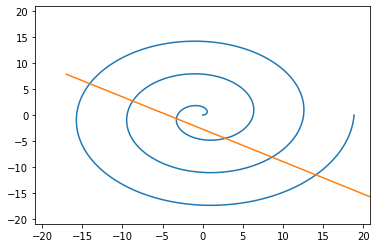

In [24]:
num_revs=3
x, y = create_spiral(0, num_revs*2*np.pi, num_points=1000)
line_x, line_y = generate_line(x, y, 1000)


line_rects = [Rectangle((line_x[i], line_y[i]), (line_x[i+1], line_y[i+1])) for i in range(len(line_x)-1)]
spiral_rects = [Rectangle((x[i], y[i]), (x[i+1], y[i+1])) for i in range(len(x)-1)]

intersecting_points = []
for line_rect in line_rects:
    for spiral_rect in spiral_rects:
        if line_rect.intersects(spiral_rect):
            intersecting_points.append((line_rect, spiral_rect))


if len(intersecting_points) > 0:
    intersecting_points_lines_p1_x = [intersecting_points[i][0].p1[0] for i in range(len(intersecting_points))]
    intersecting_points_lines_p1_y = [intersecting_points[i][0].p1[1] for i in range(len(intersecting_points))]
    
    diffs_x = np.diff(intersecting_points_lines_p1_x)
    diffs_y = np.diff(intersecting_points_lines_p1_y)

    diffs_combined = np.asarray([np.sqrt(diffs_x[i]**2 + diffs_y[i]**2) for i in range(len(diffs_x))])
    num_intersections = len(np.argwhere(np.round(diffs_combined)).flatten())+1
    
else:
    num_intersections = 0
    
print(f'Num intersections = {num_intersections}')
plt.xlim(-num_revs*2*np.pi - padding, num_revs*2*np.pi + padding)
plt.ylim(-num_revs*2*np.pi - padding, num_revs*2*np.pi + padding)
plt.plot(x,y)
plt.plot(line_x, line_y)
plt.show()